## Climate Analysis

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from sqlalchemy import create_engine

engine = create_engine("sqlite:///hawaii.sqlite", echo = False)
conn = engine.connect()

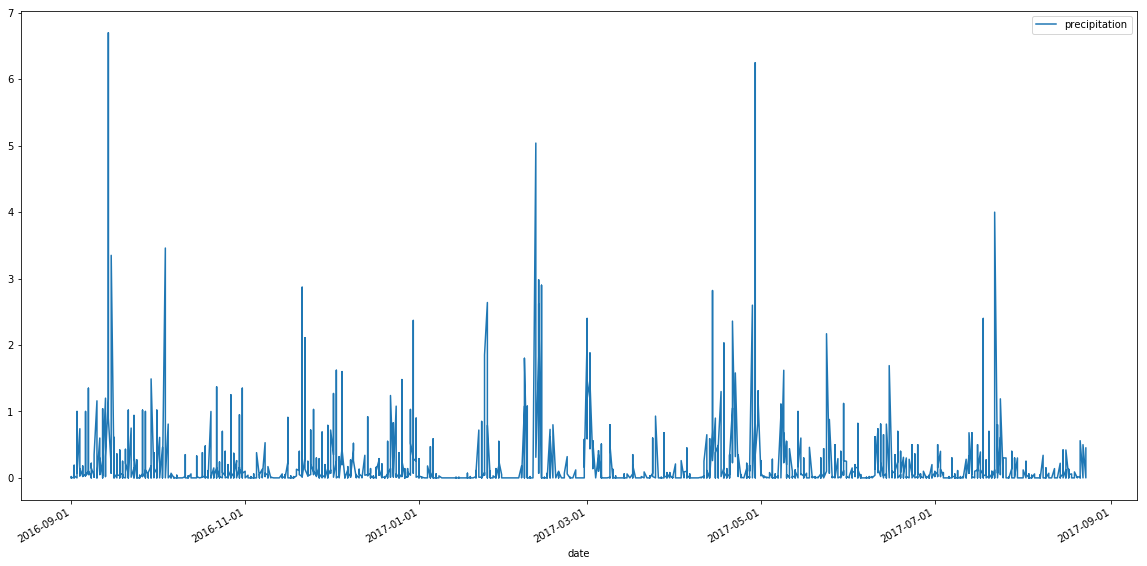

In [6]:
#Precipitation Analysis

prec = pd.read_sql('measurements', conn, parse_dates={'date': {'format': '%Y-%m-%d'}}, columns=['date', 'prcp'])
prec['month'] = prec.date.map(lambda x: x.strftime('%m')).astype('Int64')
prec['year'] = prec.date.map(lambda x: x.strftime('%Y')).astype('Int64')
prec['month_year'] = prec['year']*100 + prec['month']
# Rank month_year by Desc
prec = prec.sort_values(by='month_year', ascending=False).reset_index(drop = True)
target = prec.month_year.unique()[0:12]
prec = prec[prec['month_year'].astype(str).str.contains('|'.join(target.astype('str')))][['date', 'prcp']]

prec.shape
prec.set_index('date', inplace = True)

prec.columns = ['precipitation']

ax = prec.plot(figsize = (20, 10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

In [7]:
prec.describe()

,precipitation
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [9]:
# Count total number of stations
print('Number of Stations:', conn.execute('SELECT COUNT(DISTINCT(station)) FROM stations').fetchall()[0][0])


Number of Stations: 9


In [11]:
# List the stations and observation counts in descending order
conn.execute('SELECT station, SUM(tobs) \
              FROM measurements  \
              GROUP BY station \
              ORDER BY SUM(tobs) DESC').fetchall()

# Which station has the highest number of observations?
print('Station with highest tobs:', conn.execute('SELECT station, SUM(tobs) \
              FROM measurements  \
              GROUP BY station \
              ORDER BY SUM(tobs) DESC').fetchall()[0][0])

Station with highest tobs: USC00519397


In [12]:
conn.execute('SELECT MAX(date) FROM measurements').fetchall()[0][0]

'2017-08-23'

In [13]:
data = conn.execute("SELECT station, date, SUM(tobs) \
                     FROM measurements \
                     WHERE date >= '2016-08-23' AND station == 'USC00519397' \
                     GROUP BY station, date").fetchall()
data = pd.DataFrame(data)
data.columns = ['station', 'date', 'tobs']

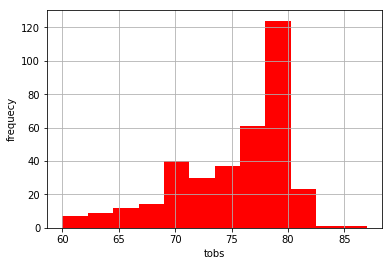

In [15]:
plt.hist(data['tobs'], bins = 12, color = 'red')
plt.xlabel('tobs')
plt.ylabel('frequecy')
plt.grid()

In [16]:
tobs = pd.read_sql('measurements', conn, parse_dates={'date': {'format': '%Y-%m-%d'}}, columns=['date', 'tobs'])

In [18]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
# and return the minimum, average, and maximum temperatures for that range of dates.

# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the
# matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

def calc_temps(start, end):
    df = tobs[(tobs.date >= start) & (tobs.date <= end)]
    dic = {}
    dic['min'] = df.tobs.min()
    dic['avg'] = df.tobs.mean()
    dic['max'] = df.tobs.max()
    return(dic)


start_date = '2017-02-01'
end_date = '2017-02-15'

temps = calc_temps(start_date, end_date)

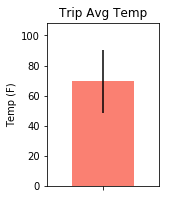

In [20]:
plt.figure(figsize=(2,3))
plt.margins(.4,.2)
plt.bar(0, height = temps['avg'], tick_label = '', yerr = temps['max'] - temps['min'], color = 'salmon')
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.show()